In [ ]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [ ]:
a = 0.5
b = 0.3
n = 1000000
s = 990000
i = 7000
r = 3000
t0, tf = 0, 25
timeline = np.linspace(0, 25, 25)

In [ ]:
def dsdt(t, s):
    return - a * s


soln = solve_ivp(dsdt, (t0, tf), [s], dense_output=True)
soln

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 98
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7f4b1e272050>
   status: 0
  success: True
        t: array([ 0.        ,  0.11486984,  1.26356819,  3.06043758,  4.8157449 ,
        6.57363058,  8.33135596, 10.08909132, 11.84682607, 13.60456089,
       15.36229578, 17.12003086, 18.87776637, 20.63550293, 22.39324202,
       24.15098721, 25.        ])
 t_events: None
        y: array([[9.90000000e+05, 9.34741505e+05, 5.26338915e+05, 2.14449863e+05,
        8.92016780e+04, 3.70563463e+04, 1.53952532e+04, 6.39600686e+03,
        2.65724217e+03, 1.10395999e+03, 4.58643792e+02, 1.90545047e+02,
        7.91625391e+01, 3.28883086e+01, 1.36635268e+01, 5.67652784e+00,
        3.71298656e+00]])
 y_events: None

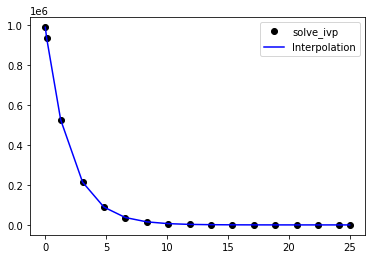

In [ ]:
ts, ys = soln.t, soln.y[0]
plt.plot(ts, ys, 'o', color='k', label='solve_ivp')
plt.plot(ts, ys, color='blue', label='Interpolation')
plt.legend()
plt.show()

In [ ]:
def didt(t, i):
    return a*soln.sol(t)-b*i


soln_i = solve_ivp(didt, (t0, tf), [r], dense_output=True)
soln_i

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 80
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7f4b1dd179d0>
   status: 0
  success: True
        t: array([0.00000000e+00, 6.07164542e-03, 6.67880996e-02, 6.73952641e-01,
       2.35160376e+00, 4.34918741e+00, 6.82741053e+00, 1.02093457e+01,
       1.33074113e+01, 1.64054770e+01, 1.94241156e+01, 2.23975207e+01,
       2.50000000e+01])
 t_events: None
        y: array([[  3000.        ,   5992.7147686 ,  35129.32194336,
        257413.79010901, 460008.75224341, 390800.42026395,
        238121.155129  , 100912.45325945,  42603.58514183,
         17413.25961246,   7168.89866188,   2967.18453735,
          1365.77405316]])
 y_events: None

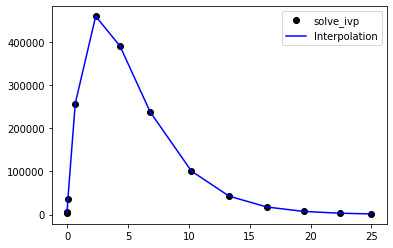

In [ ]:
ti, yi = soln_i.t, soln_i.y[0]
plt.plot(ti, yi, 'o', color='k', label='solve_ivp')
plt.plot(ti, yi, color='blue', label='Interpolation')
plt.legend()
plt.show()

In [ ]:
def drdt(t, _):
    return b*soln_i.sol(t)


soln_r = solve_ivp(drdt, (t0, tf), [r], dense_output=True)
soln_r

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 38
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7f4b1dcaa590>
   status: 0
  success: True
        t: array([ 0.        ,  0.04596173,  0.505579  ,  2.51970439,  6.36119025,
       13.01333901, 25.        ])
 t_events: None
        y: array([[  3000.        ,   3196.02435773,  20029.86654026,
        253659.58885902, 690144.16139866, 948182.24108506,
        994687.15476765]])
 y_events: None

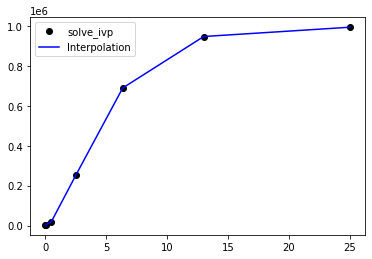

In [ ]:
tr, yr = soln_r.t, soln_r.y[0]
plt.plot(tr, yr, 'o', color='k', label='solve_ivp')
plt.plot(tr, yr, color='blue', label='Interpolation')
plt.legend()
plt.show()

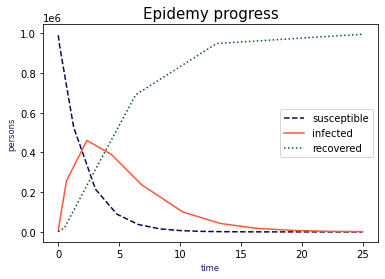

In [ ]:
plt.plot(
    ts,
    ys,
    label="susceptible",
    linestyle="--",
    color="#100658",
)
plt.plot(
    ti,
    yi,
    label="infected",
    linestyle="-",
    color="#FF5733",
)
plt.plot(
    tr,
    yr,
    label="recovered",
    linestyle=":",
    color="#065812",
)
plt.xlabel("time", fontsize="small", color="midnightblue")
plt.ylabel("persons", fontsize="small", color="midnightblue")
plt.title("Epidemy progress", fontsize=15)
plt.legend()
plt.show()